In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)

In [2]:
AA="C:/Users/ganes/oneDrive/Desktop/AI/FD/FDMCF.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape


(1544, 22)

In [3]:
A=df['Al2O3/Si']
B=df["B2O3/Si"]
C = df['BeO/Si']
D = df['Ga2O3/Si']
E = df["GeO2/Si"]
F=df['Li2O/Si']
G=df["K2O/Si"]
H = df['Na2O/Si']
I = df['Rb2O/Si']
J=df['Cs2O/Si']
K=df["SrO/Si"]
L = df['H2O/Si']
M=df['F/Si']
N= df['OSDA-1/Si']
O= df['OSDA-2/Si']
P=df["OH/Si"]
Q=df["Area-1"]
R=df["Area-2"]
S=df["T"]
T=df["t"]
U=df["rpm"]
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape




(1544, 21)

In [4]:
X_OS=List1
Y_OS=df["FDCMC"]

C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train accuracy 0.985967338440263
test accuracy 0.8063259321323837
train precision 0.9860046628605434
test precision 0.796731688173564
train recall 0.985586675215775
test recall 0.7563778391040834
train f1 0.9856706857872226
test f1 0.7629320861064782
train               precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.96      1.00      0.98        26
           2       0.99      0.98      0.99       185
           3       0.99      1.00      0.99        91
           4       0.95      0.99      0.97       101
           5       1.00      0.99      0.99        84
           6       0.98      0.96      0.97       133
           7       0.94      0.96      0.95        85
           8       1.00      0.95      0.97        20
           9       0.98      0.98      0.98       311
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00       139
          12       0.99      1.00      1

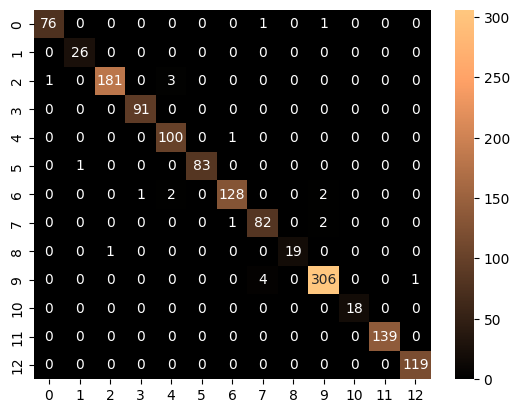

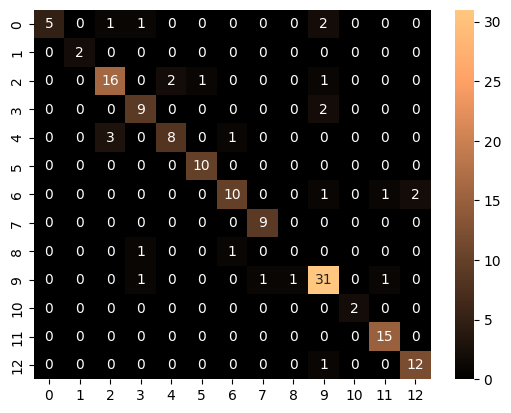

In [6]:
score_trainacc, score_testacc, score_trainpre, score_testpre,score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_RFtrain=list()
mmc_RFtest=list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    RF=RandomForestClassifier(random_state=1, )
    rf_model=RF.fit(X_Train,Y_Train)
    predict_RFTrain=RF.predict(X_Train)
    predict_RFTest=RF.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_RFTrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_RFTest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_RFTrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_RFTest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_RFTrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_RFTest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_RFTrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_RFTest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_RFTrain)
    conf_matrix_Train.append(conf_matrix1)
    conf_matrix2 = confusion_matrix(Y_Test, predict_RFTest)
    conf_matrix_Test.append(conf_matrix2)
    mmctrain= metrics.matthews_corrcoef(Y_Train, predict_RFTrain)
    mmctest= metrics.matthews_corrcoef(Y_Test, predict_RFTest)
    mmc_RFtrain.append(mmctrain)
    mmc_RFtest.append(mmctest)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_RFTrain))
print("test", metrics.classification_report(Y_Test, predict_RFTest)) 
print('Matthews correlation coefficient Train',mean(mmc_RFtrain))
print('Matthews correlation coefficient Test',mean(mmc_RFtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()

C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train accuracy 0.985967338440263
test accuracy 0.7940343527440301
train precision 0.9849782023568006
test precision 0.7832898298877699
train recall 0.9865724226770143
test recall 0.7505781404367378
train f1 0.9856724775272341
test f1 0.7553399976896076
train               precision    recall  f1-score   support

           0       0.96      1.00      0.98        78
           1       0.96      1.00      0.98        26
           2       0.98      0.99      0.99       185
           3       0.99      1.00      0.99        91
           4       0.96      0.98      0.97       101
           5       1.00      0.99      0.99        84
           6       0.98      0.96      0.97       133
           7       0.95      0.95      0.95        85
           8       1.00      0.95      0.97        20
           9       0.99      0.98      0.99       311
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00       139
          12       0.99      1.00     

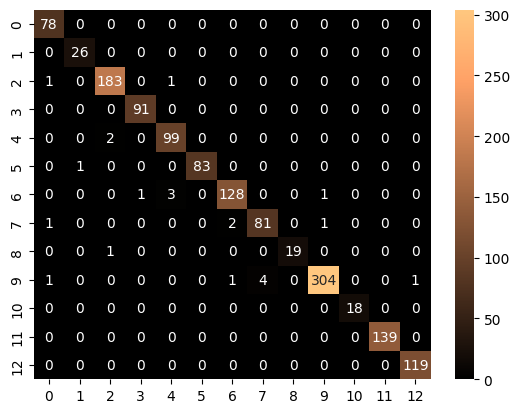

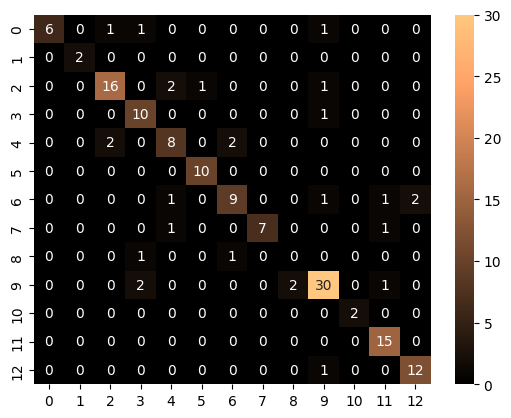

In [7]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_ettrain=list()
mmc_ettest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    ET=ExtraTreesClassifier(random_state=1, )
    ET_model=ET.fit(X_Train, Y_Train)
    predict_ettrain=ET.predict(X_Train)
    predict_ettest=ET.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_ettrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_ettest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_ettrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_ettest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_ettrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_ettest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_ettrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_ettest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_ettrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_ettest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_ettrain)
    mmc_ettrain.append(mmc_train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_ettest)
    mmc_ettest.append(mmc_test)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_ettrain))
print("test", metrics.classification_report(Y_Test, predict_ettest)) 
print('Matthews correlation coefficient Train',mean(mmc_ettrain))
print('Matthews correlation coefficient Test',mean(mmc_ettest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

train accuracy 0.985967338440263
test accuracy 0.7979388353581902
train precision 0.9849782023568006
test precision 0.7469514742241862
train recall 0.9865724226770143
test recall 0.7482492633058244
train f1 0.9856724775272341
test f1 0.7374602193230543
train               precision    recall  f1-score   support

           0       0.96      1.00      0.98        78
           1       0.96      1.00      0.98        26
           2       0.98      0.99      0.99       185
           3       0.99      1.00      0.99        91
           4       0.96      0.98      0.97       101
           5       1.00      0.99      0.99        84
           6       0.98      0.96      0.97       133
           7       0.95      0.95      0.95        85
           8       1.00      0.95      0.97        20
           9       0.99      0.98      0.99       311
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00       139
          12       0.99      1.00     

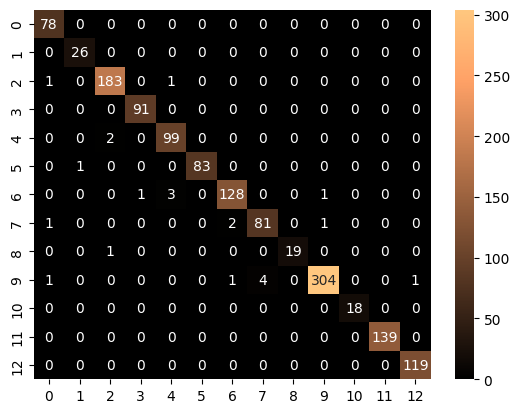

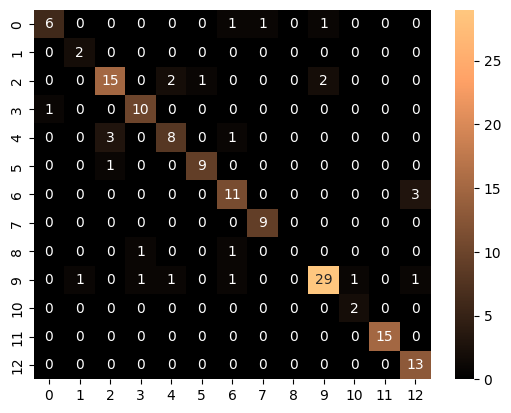

In [8]:
conf_matrix_Train =[] 
conf_matrix_Test=[] 
mmc_dttrain=list()
mmc_dttest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv =StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    DT=DecisionTreeClassifier(random_state=1,criterion="entropy" )
    dt_model=DT.fit(X_Train,Y_Train)    
    predict_dttrain=DT.predict(X_Train)
    predict_dttest=DT.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_dttrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_dttest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_dttrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_dttest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_dttrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_dttest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_dttrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_dttest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_dttrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_dttest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_dttrain)
    mmc_dttrain.append(mmc_train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_dttest)
    mmc_dttest.append(mmc_test)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_dttrain))
print("test", metrics.classification_report(Y_Test, predict_dttest))
print('Matthews correlation coefficient Train',mean(mmc_dttrain))
print('Matthews correlation coefficient Test',mean(mmc_dttest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


In [9]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from io import StringIO

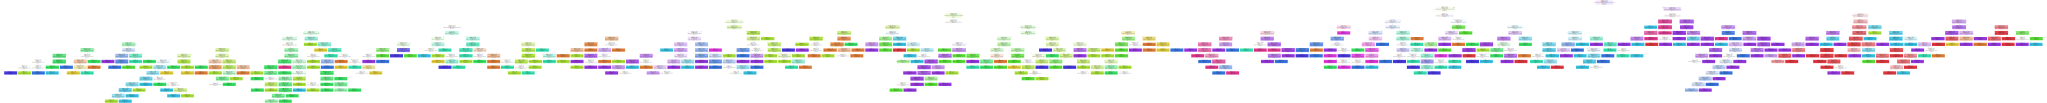

In [10]:
fn=["Al2O3/Si", 'B2O3/Si', 'BeO/Si', 'Ga2O3/Si', 'GeO2/Si', 'Li2O/Si', "K2O/Si", "Na2O/Si",
           "Rb2O/Si", "Cs2O/Si", "SrO/Si", "H2O/Si", "F/Si", "OSDA-1/Si", "OSDA-2/Si", "OH/Si",
           "Area-1", "Area-2", "T", "t", "rpm"]
cn=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
dot_data = tree.export_graphviz(DT,  feature_names = fn, class_names=cn,  filled = True)
graph = graphviz.Source(dot_data, format="png") 
graph 

In [11]:
graph.render("FDCMC Zeolite-no oversampling")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.579035 to fit


'FDCMC Zeolite-no oversampling.png'

C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train accuracy 0.9828730363441428
test accuracy 0.7985211562630917
train precision 0.9826815297491478
test precision 0.7974591297554504
train recall 0.9829215680609341
test recall 0.7604644795877827
train f1 0.9826823673041014
test f1 0.7657620890895498
train               precision    recall  f1-score   support

           0       0.99      0.96      0.97        78
           1       0.96      1.00      0.98        26
           2       0.98      0.98      0.98       185
           3       0.99      1.00      0.99        91
           4       0.96      0.96      0.96       101
           5       0.98      0.99      0.98        84
           6       0.96      0.97      0.97       133
           7       0.93      0.95      0.94        85
           8       1.00      0.95      0.97        20
           9       0.99      0.98      0.99       311
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00       139
          12       0.99      1.00    

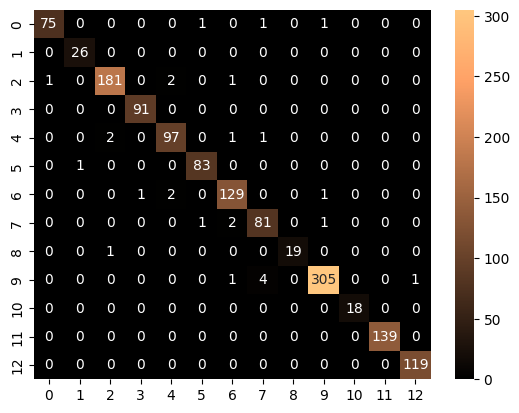

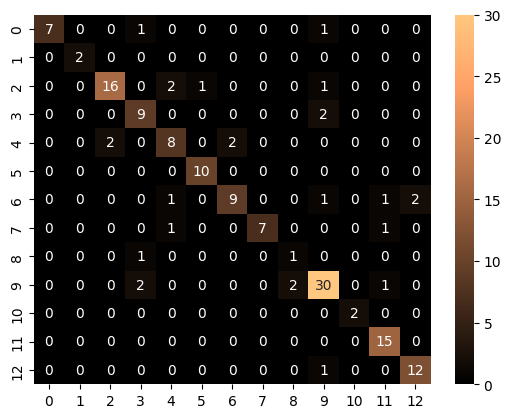

In [12]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_ettrain=list()
mmc_ettest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    ET=ExtraTreesClassifier(random_state=1,min_samples_split=4)
    ET_model=ET.fit(X_Train, Y_Train)
    predict_ettrain=ET.predict(X_Train)
    predict_ettest=ET.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_ettrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_ettest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_ettrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_ettest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_ettrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_ettest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_ettrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_ettest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_ettrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_ettest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_ettrain)
    mmc_ettrain.append(mmc_train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_ettest)
    mmc_ettest.append(mmc_test)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_ettrain))
print("test", metrics.classification_report(Y_Test, predict_ettest)) 
print('Matthews correlation coefficient Train',mean(mmc_ettrain))
print('Matthews correlation coefficient Test',mean(mmc_ettest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train accuracy 0.9643784410916192
test accuracy 0.8069836614997905
train precision 0.9685623489112875
test precision 0.7795660217519071
train recall 0.9680468181270449
test recall 0.7542328467158784
train f1 0.9679379856135693
test f1 0.756247103495197
train               precision    recall  f1-score   support

           0       0.95      0.97      0.96        78
           1       0.96      1.00      0.98        26
           2       0.95      0.96      0.95       185
           3       0.99      0.99      0.99        91
           4       0.91      0.95      0.93       101
           5       0.99      0.96      0.98        84
           6       0.98      0.88      0.93       133
           7       0.90      0.91      0.90        85
           8       1.00      0.95      0.97        20
           9       0.96      0.97      0.97       311
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00       139
          12       0.98      1.00     

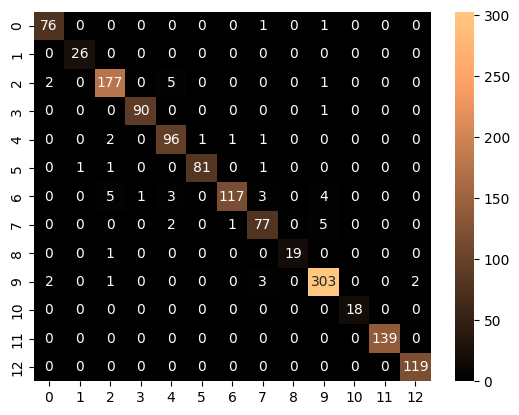

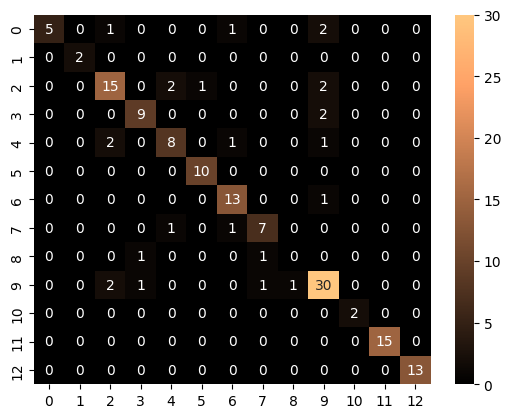

In [13]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_gbtrain=list()
mmc_gbtest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    GB = GradientBoostingClassifier(random_state=1, )
    gb_model=GB.fit(X_Train, Y_Train)
    predict_gbtrain=GB.predict(X_Train)
    predict_gbtest=GB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_gbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_gbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_gbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_gbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_gbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_gbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_gbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_gbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_gbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_gbtest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_gbtrain)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_gbtest)
    mmc_gbtrain.append(mmc_train)
    mmc_gbtest.append(mmc_test)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_gbtrain))
print("test", metrics.classification_report(Y_Test, predict_gbtest))
print('Matthews correlation coefficient Train',mean(mmc_gbtrain))
print('Matthews correlation coefficient Test',mean(mmc_gbtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train accuracy 0.985967338440263
test accuracy 0.8322161709258484
train precision 0.9864687832475688
test precision 0.808948102485636
train recall 0.9852716718771605
test recall 0.786190672073025
train f1 0.9857528865722445
test f1 0.7880812759594643
train               precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.96      1.00      0.98        26
           2       0.99      0.98      0.99       185
           3       0.99      1.00      0.99        91
           4       0.95      0.99      0.97       101
           5       1.00      0.99      0.99        84
           6       0.99      0.95      0.97       133
           7       0.95      0.95      0.95        85
           8       1.00      0.95      0.97        20
           9       0.98      0.99      0.98       311
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00       139
          12       0.99      1.00      1

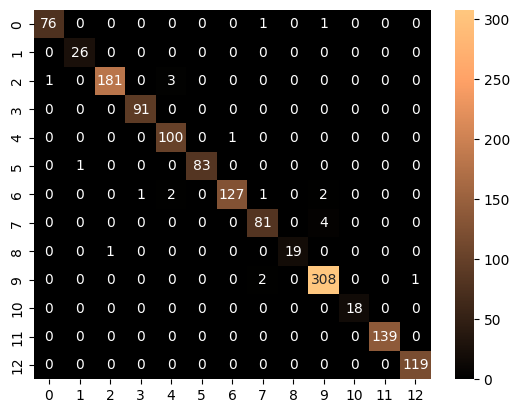

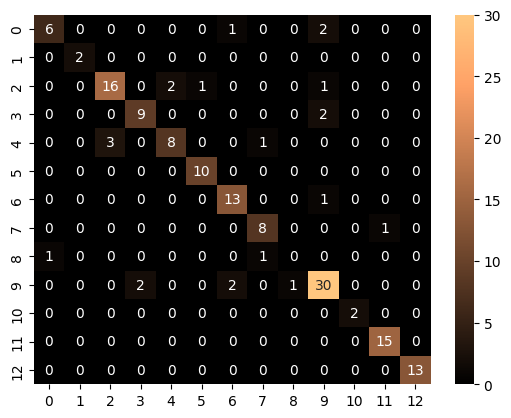

In [14]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_xgbtrain=list()
mmc_xgbtest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    XGB = XGBClassifier(random_state=1, )
    xgb_model=XGB.fit(X_Train, Y_Train)
    predict_xgbtrain=XGB.predict(X_Train)
    predict_xgbtest=XGB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_xgbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_xgbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_xgbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_xgbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_xgbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_xgbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_xgbtest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_xgbtrain)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_xgbtest)
    mmc_xgbtrain.append(mmc_train)
    mmc_xgbtest.append(mmc_test)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_xgbtrain))
print("test", metrics.classification_report(Y_Test, predict_xgbtest))
print('Matthews correlation coefficient Train',mean(mmc_xgbtrain))
print('Matthews correlation coefficient Test',mean(mmc_xgbtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()
